# Optimization of a CNN to classify RGB images

The goal of this exercice is to train and optimize an artificial neural network on images from the [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html) database. In that case, the images are classifiy according to 10 different classes : airplane, car, truck, bird, cat, dog, deer, horse, frog and ship. 
There is several difficulties in that case :
- several classes are quite close (sucah as car and truck) and will require a thourough training of the network to efficiently differentiate the images
- the images are RGB and of very low quality

## I - Downloading the CIFAR image database

First step - we will all the necessary libraries.

**Exercise** :
- from tensorflow, import keras 

In [ ]:
# to show images directly in the notebook
%matplotlib inline

# to display tensorboard directly in the notebook
# %load_ext tensorboard

import numpy as np    # scientific computing 
import matplotlib.pyplot as plt   # plotting and visualisation
import random 

# import keras and its libraries
%tensorflow_version 2.x
from tensorflow import ###

from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

Then we import the CIFAR database and display few examples. 

**Exercise** :
- from keras import the cifar10 image dataset
- load the training and testing dataset
- plot 9 images in a 3x3 layout by randomly selecting data from the training set


The CIFAR database contains 50000 images for training and 10000 images for testing/validation
X_train/X_val are composed of four dimensions. For example, X_train is (50000, 32, 32, 3) and are respectively:
- the number of images in the database
- the 2D size of the images
- the number of channels (for example the images are RGB and contain 3 channels)



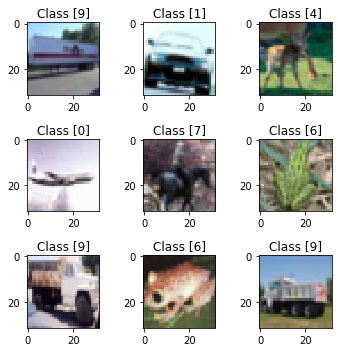

In [ ]:
from keras.datasets import ###

(X_train, y_train), (X_val, y_val) = ###

plt.rcParams['figure.figsize'] = (5,5) # Define the figure size
for i in range(9):

###
    
plt.tight_layout()

print('')
print('The CIFAR database contains {} images for training and {} images for testing/validation'.format(len(X_train), len(X_val)))
print('X_train/X_val are composed of four dimensions. For example, X_train is {} and are respectively:'.format(X_train.shape))
print('- the number of images in the database')
print('- the 2D size of the images')
print('- the number of channels (for example the images are RGB and contain 3 channels)')
print('')

In [ ]:
im = X_train[0]
print('The size of the image is {} pixels'.format(im.shape))
print('The minimum pixel value is {} and the maxium  {}'.format(np.min(im), np.max(im)))

The size of the image is (32, 32, 3) pixels
The minimum pixel value is 0 and the maxium  255


## II - Formatting the data

As already discussed for the MNIST, we need to normalize the images before working with them. In the case of the CIFAR database, the images are composed of 3 channels (RGB) and **each channel needs to be normalized separately**. 

In [ ]:
# calculate for each channel the average and std
# -----------------------------------------------

X_train = X_train.astype(float)/255
X_val = X_val.astype(float)/255

Er = np.mean(X_train[:,:,:,0])
Eg = np.mean(X_train[:,:,:,1])
Eb = np.mean(X_train[:,:,:,2])

sr = np.std(X_train[:,:,:,0])
sg = np.std(X_train[:,:,:,1])
sb = np.std(X_train[:,:,:,2])

# Normalize data so that average is zero and std 1
# ------------------------------------------------

X_train[:,:,:,0] = (X_train[:,:,:,0]-Er)/sr
X_train[:,:,:,1] = (X_train[:,:,:,1]-Eg)/sg
X_train[:,:,:,2] = (X_train[:,:,:,2]-Eb)/sb

X_val[:,:,:,0] = (X_val[:,:,:,0]-Er)/sr
X_val[:,:,:,1] = (X_val[:,:,:,1]-Eg)/sg
X_val[:,:,:,2] = (X_val[:,:,:,2]-Eb)/sb

The labels are also changed from **single digit** to **categorical or one-hot format**.
Exercise :
- convert the training labels in the one-hot format
- do the same for the validation data

In [ ]:
from keras.utils import np_utils  # NumPy related tools

Y_train = ###
Y_val = ###

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## III- Creating and training a simple network for digit classification

We will now build a CNN network able to read the CIFAR images as input and return a vector indicating the predicted class for each image. 

**Exercise** :
- import the module Sequential to build sequential neural networks
- import the layers you will need to build your models
- create your model
- select the optimize
- select the loss function
- select the metrics

In [ ]:
from keras.models import ### # Model sequential to be used
from keras.layers import ###

modelCNN = Sequential([

### Complete your network

])

# Compile the model defining the optimizer and the loss function 
# --------------------------------------------------------------

modelCNN.compile(optimizer = ###, 
              loss= ###,
              metrics= ###)

# Return a full description of the network
# ----------------------------------------
modelCNN.summary()

# Create the image augmentation generator
# ---------------------------------------

# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# it_train = datagen.flow(X_train, Y_train, batch_size=32)
# steps = int(X_train.shape[0] / 32)

And train it !

**Exercise** :
- define the fit functions with the proper training and validation data
- select 10 epochs
- select a batchsize of of 32 images

In [ ]:
#from keras.callbacks import TensorBoard  #Visulization of Accuracy and loss
#
## tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#%load_ext tensorboard
#
#tb_FC = TensorBoard('runs/CIFAR_v1', histogram_freq=1)
#%tensorboard --logdir runs

history = ###

## IV- Evaluate the model accuracy :

Calculate the accuracy of the model using the test set.
Exercise : 
- evaluate the accuracy of your model using the validation data

In [ ]:
test_loss, test_acc = ###
print('test_acc:', test_acc)

It is always useful to check the performance of the network on randomly selected images. More precisely, to improve our network, we need to understand why the network is sometimes failing. 
Below, we are going to test the network on the validation set and select images for which the network prediction is right and other for which the predition is wrong.  

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
# -----------------------------------------------------------

predicted_classes = modelCNN.predict(X_val)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Check which items we got right / wrong
# --------------------------------------

correct_indices = np.nonzero(predicted_classes == y_val[:,0])[0]
incorrect_indices = np.nonzero(predicted_classes != y_val[:,0])[0]

print(len(correct_indices))
print(len(incorrect_indices))

Display a few example for which the network is right

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:3]):
    plt.subplot(3,1,i+1)
    plt.imshow(X_val[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_val[correct][0]))
    
plt.tight_layout()

... and a few where the network is wrong!

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:3]):
    plt.subplot(3,1,i+1)
    plt.imshow(X_val[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_val[incorrect][0]))
    
plt.tight_layout()

## V- Network performances

Below the learning curves are displayed : 

In [ ]:
history_dict = history.history
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger

# Plot the evolution of the accuracy during the training
# ------------------------------------------------------

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

n = len(acc_values)
epochs = range(1, n+1)

plt.subplot(2,1,1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the evolution of the loss during the training
# ------------------------------------------------------

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.subplot(2,1,2)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Since we are working with 10 different categories, it is often useful to look at the performances of the network for each category. Below, two different tools are used to display the results :
- **classification report** is creating a small summary of the network performances for each category, using different metrics
- **confusion matrix** is returning a matrix indicating for each classes the propotion of true positive detections as well as the proportions of false negative and to which classes they are assigned. 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['aiplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('Classification report :')
print('')
print(classification_report(np.argmax(Y_val, axis=1), predicted_classes, target_names=target_names))

print('')
print('Confusion matrix :')
print('')
print(np.around(confusion_matrix(np.argmax(Y_val, axis=1), predicted_classes)/1000,2))